# Converting VGG Image Annotator .CSV Annotations to Faster RCNN-style .TXT Files

📝 **Overview**

This notebook helps you convert annotation data created using the VGG Image Annotator into individual .txt files - one for each image. These converted annotations follow the `[x1, y1, x2, y2]` format commonly used in object detection pipelines and are essential for training a neural network later on.

VGG Image Annotator stores bounding boxes using the following values:
- `x` and `y`: top-left corner of the box
- `width` and `height`: size of the box

However, many deep learning frameworks (including PyTorch and TensorFlow object detection pipelines) require bounding boxes in the `[x1, y1, x2, y2]` format:
- `x1, y1`: top-left corner
- `x2, y2`: bottom-right corner (computed as x + width, y + height)

This notebook automates that conversion for you.


🔧 **How to Use**
1. When running the notebook, you will first be prompted to mount your Google Drive.
2. In the User input section:
  1. Provide the path to your VGG .csv file on your Drive.
  2. Specify an output directory on your Drive where the converted .txt files will be saved.
4. Run the rest of the code and each .txt file will correspond to an image and contain the bounding box coordinates in the required format.

✅ Note: This notebook runs on CPU only—no GPU connection is needed.





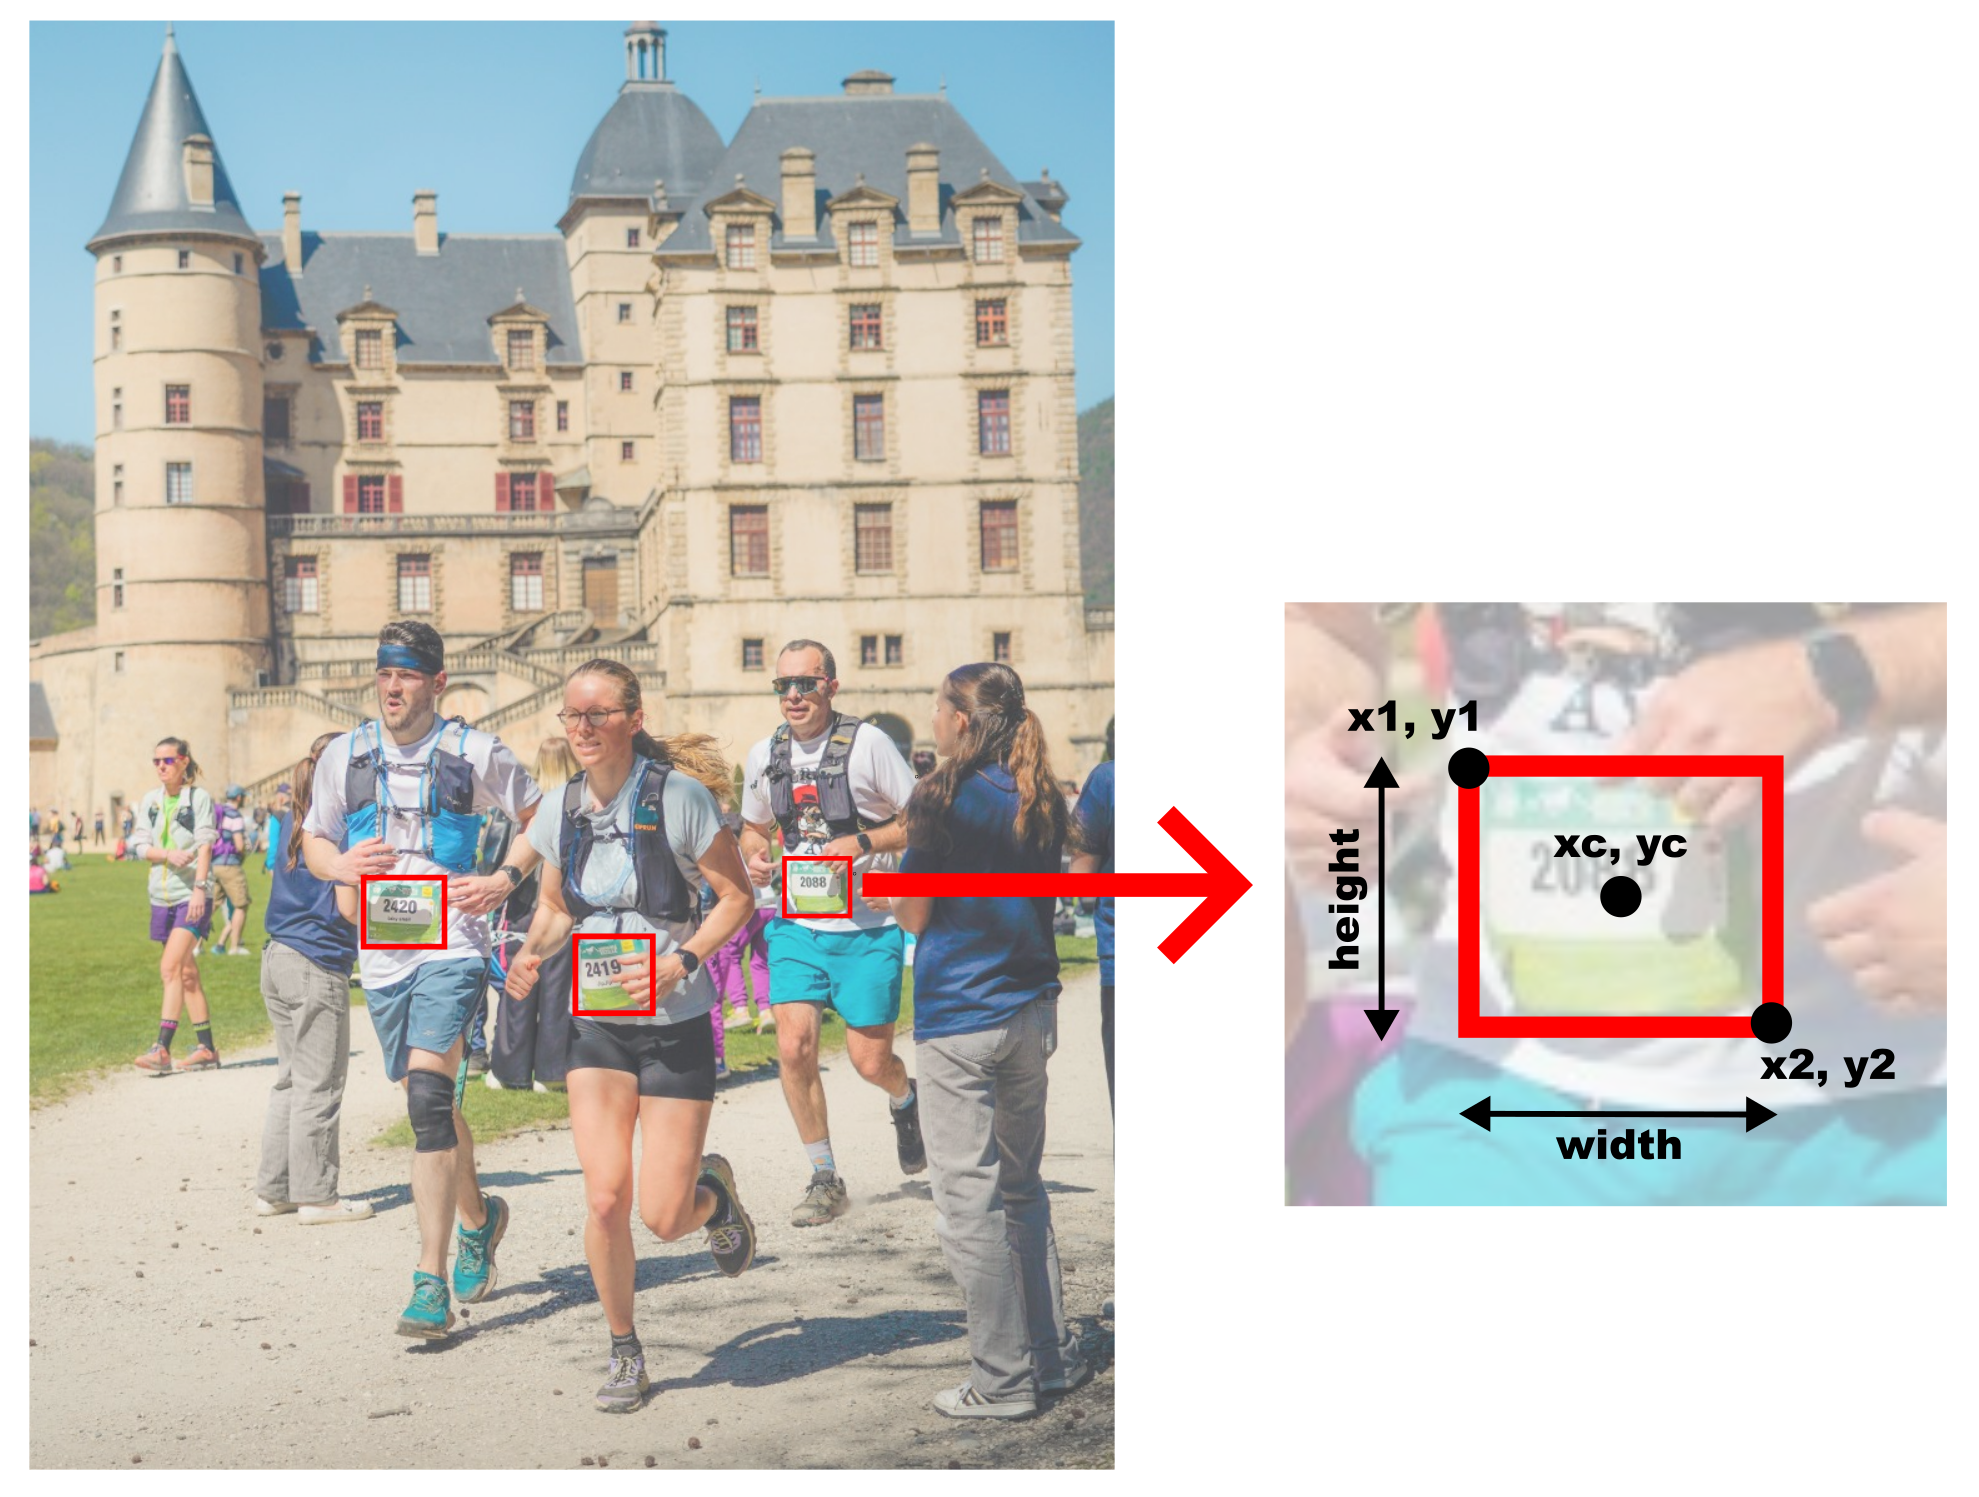

## Mount google drive

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## User input

In [ ]:
VGG_file = "/content/drive/MyDrive/VGG_annotations/Annotations.csv" # VGG annotation file
dir_out = "/content/drive/MyDrive/TXT_annotations/" # Output directory to save the txt annotations

## Write txt files

In [ ]:
# Imports
import pandas as pd
import json
import os

In [ ]:
# Creat out put directory
os.makedirs(dir_out, exist_ok=True)

# Read VGG file
f_in = f_in = pd.read_csv(VGG_file)

# Main code
for filename in f_in['#filename'].unique(): # Loop over images and create one .txt file per image
    f = dir_out + filename[:-4] + '.txt' # image name + .txt
    f_out = open(f, 'w')

    df_subset = f_in[f_in['#filename'] == filename] # bbox by image
    for bbox in df_subset['region_shape_attributes']:
        bbox_dict = json.loads(bbox) # To dictonary
        if bbox_dict != {}:
            x_min = bbox_dict['x'] # Upper left coord
            y_min = bbox_dict['y'] # Upper left coord
            x_max = bbox_dict['x'] + bbox_dict['width']
            y_max = bbox_dict['y'] + bbox_dict['height']
            string = str(x_min) + ',' + str(y_min) + ',' + str(x_max) + ',' + str(y_max) + '\n'
            f_out.write(string)
    f_out.close()